In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv('new_data1.csv')
X = df[['Temperature_1', 'Wind_Speed_1', 'weather_code_1', 'Distance_travelled_1']] 
y = df['VSKP']
print(df)

    date(dd/mm/yy)  VSKP  Temperature_1  Wind_Speed_1  weather_code_1  \
0         06/08/23     2           30.2           2.8              63   
1         07/08/23     2           31.2           2.1              51   
2         08/08/23     0           30.5           2.4              51   
3         09/08/23     1           30.5           2.3              53   
4         10/08/23     0           30.2           2.3              51   
..             ...   ...            ...           ...             ...   
360       31/07/24     1           29.8           2.0              51   
361       01/08/24     4           30.0           2.8              55   
362       02/08/24     1           28.6           2.6              61   
363       03/08/24     0           28.3           2.1              51   
364       04/08/24     4           29.6           2.5              51   

     Distance_travelled_1  YLM  Temperature_2  Wind_Speed_2  weather_code_2  \
0                       0   12           30.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [33]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 606.53083575613
R^2 Score: 0.34453579057277384


In [34]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [35]:
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)

print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train}")
print(f"R^2 Score: {r2_train}")



Training Set Metrics:
Mean Squared Error (MSE): 710.9227984696529
Root Mean Squared Error (RMSE): 26.66313557085237
Mean Absolute Percentage Error (MAPE): inf
R^2 Score: 0.6464234473520167


In [36]:
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test}")
print(f"R^2 Score: {r2_test}")



Test Set Metrics:
Mean Squared Error (MSE): 606.53083575613
Root Mean Squared Error (RMSE): 24.62784675435776
Mean Absolute Percentage Error (MAPE): inf
R^2 Score: 0.34453579057277384


In [37]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd


# Convert weather_codes to categorical
df['weather_code_1'] = df['weather_code_1'].astype('category')
df['weather_code_2'] = df['weather_code_2'].astype('category')
df['weather_code_3'] = df['weather_code_3'].astype('category')
df['weather_code_4'] = df['weather_code_4'].astype('category')
df['weather_code_5'] = df['weather_code_5'].astype('category')
df['weather_code_6'] = df['weather_code_6'].astype('category')
df['weather_code_7'] = df['weather_code_7'].astype('category')
df['weather_code_8'] = df['weather_code_8'].astype('category')
df['weather_code_9'] = df['weather_code_9'].astype('category')
df['weather_code_10'] = df['weather_code_10'].astype('category')
imputer = SimpleImputer(strategy='mean')
df['BZA'] = imputer.fit_transform(df[['BZA']])

X = df.drop(['HYB', 'date(dd/mm/yy)'], axis=1)  # Dropping 'date' assuming it's not needed for prediction
y = df['HYB']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train your model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print all metrics
print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"R^2 Score: {r2_train}")

print("\nTest Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"R^2 Score: {r2_test}")


Training Set Metrics:
Mean Squared Error (MSE): 710.9227984696529
Root Mean Squared Error (RMSE): 26.66313557085237
R^2 Score: 0.6464234473520167

Test Set Metrics:
Mean Squared Error (MSE): 606.53083575613
Root Mean Squared Error (RMSE): 24.62784675435776
R^2 Score: 0.34453579057277384


In [38]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np


# Drop the target variable 'HYB' and 'date(dd/mm/yy)'
X_clustering = df.drop(['HYB', 'date(dd/mm/yy)'], axis=1)

# Initialize KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)

kmeans.fit(X_clustering)

cluster_labels = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

print("Cluster Labels:")
print(cluster_labels)
print("\nCluster Centers:")
print(cluster_centers)


Cluster Labels:
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Cluster Centers:
[[  1.29834254  29.12541436   2.02154696   5.66298343   0.
   13.43093923  29.04254144   3.38618785  52.90055249  58.
   17.47513812  29.75801105   2.07734807  53.71270718 114.
   18.59668508  29.7839779    2.78895028  55.099

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Drop the target variable 'HYB' and 'date(dd/mm/yy)'
X_clustering = df.drop(['HYB', 'date(dd/mm/yy)'], axis=1)

# Initialize KMeans
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit KMeans clustering on the data
kmeans.fit(X_clustering)

# Get cluster labels
cluster_labels = kmeans.labels_

# Calculate Silhouette Score
silhouette = silhouette_score(X_clustering, cluster_labels)

# Calculate Calinski-Harabasz Score (CH Score)
ch_score = calinski_harabasz_score(X_clustering, cluster_labels)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_clustering, cluster_labels)

# Print the metrics
print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Score: {ch_score}")
print(f"Davies-Bouldin Index: {db_index}")


Silhouette Score: 0.358422133111375
Calinski-Harabasz Score: 211.4107447318217
Davies-Bouldin Index: 1.1813681820151496


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

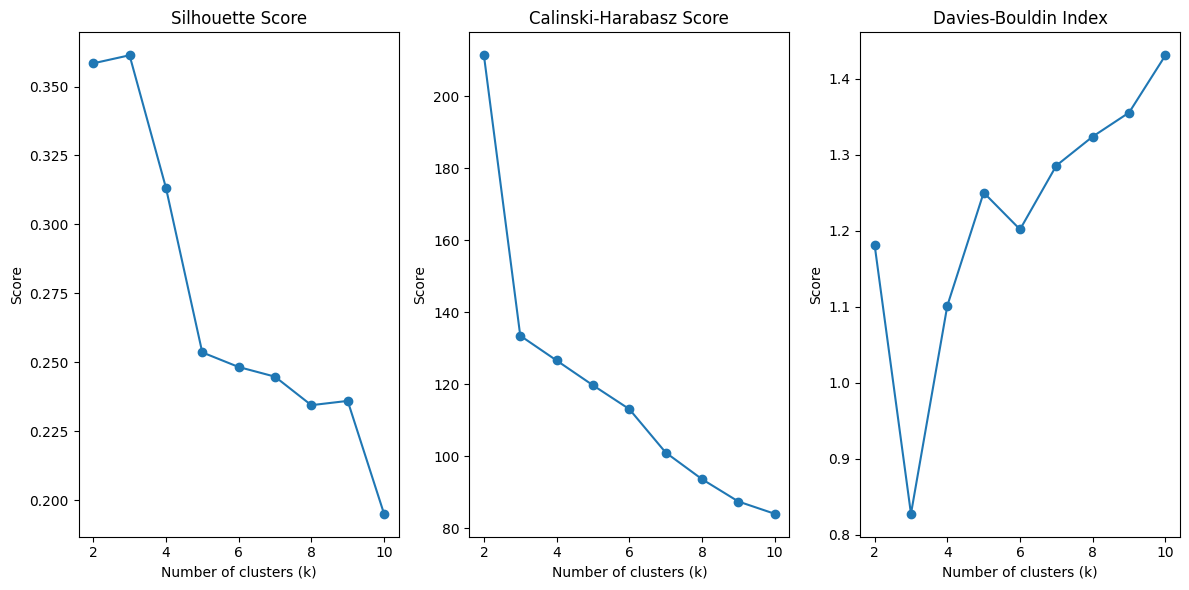

In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X_clustering = df.drop(['HYB', 'date(dd/mm/yy)'], axis=1)

k_values = range(2, 11)  # Evaluate from 2 to 10 clusters

# Initialize lists to store evaluation scores
silhouette_scores = []
ch_scores = []
db_scores = []

for k in k_values:
    # Initialize KMeans with current k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans clustering on the data
    kmeans.fit(X_clustering)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Calculate Silhouette Score
    silhouette = silhouette_score(X_clustering, cluster_labels)
    silhouette_scores.append(silhouette)
    
    # Calculate Calinski-Harabasz Score (CH Score)
    ch_score = calinski_harabasz_score(X_clustering, cluster_labels)
    ch_scores.append(ch_score)
    
    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(X_clustering, cluster_labels)
    db_scores.append(db_index)

# Plotting the scores against the number of clusters (k)
plt.figure(figsize=(12, 6))

# Silhouette Score plot
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')

# Calinski-Harabasz Score plot
plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')

# Davies-Bouldin Index plot
plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

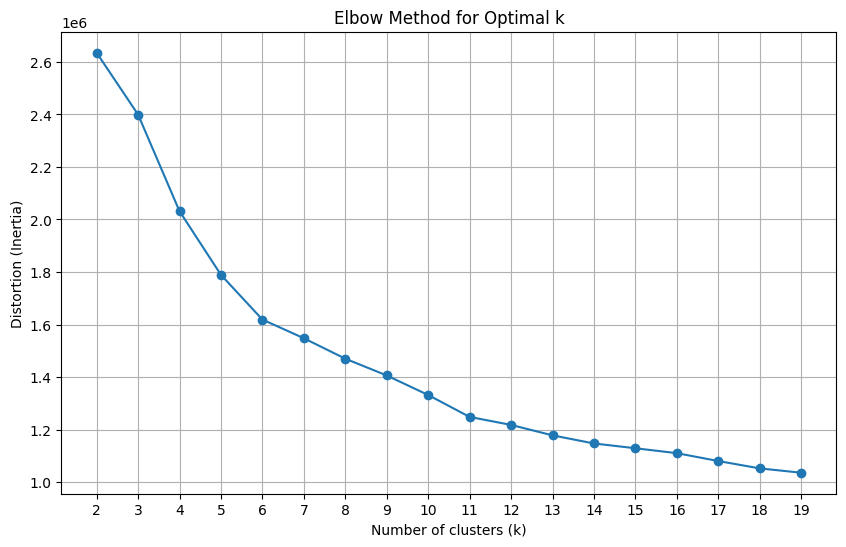

In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X_train_clustering = df.drop(['HYB', 'date(dd/mm/yy)'], axis=1)

# Initialize list to store distortions (inertia)
distortions = []

# Loop over each k value
for k in range(2, 20):
    # Initialize KMeans with current k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans clustering on the training data
    kmeans.fit(X_train_clustering)
    
    # Append the inertia (distortion) to the list
    distortions.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.xticks(range(2, 20))
plt.grid(True)
plt.show()
